<a href="https://colab.research.google.com/github/kanri3/machine_learning/blob/main/kmeans_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k平均クラスタリング(k-means)

変数命名のルール  
行列：M_はじまり  
ベクトル：v_はじまり  
スカラー等：その他

In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# numpy.ndarrayの要素を
# 指数表記にしない：suppress=True
# 小数点以下の桁数を指定：precision=
np.set_printoptions(suppress=True, precision=2)


# データ生成

In [79]:
def gen_data():
    M_x1 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    M_x2 = np.random.normal(size=(100, 2)) + np.array([5, -5])
    M_x3 = np.random.normal(size=(100, 2)) + np.array([-5, 5])
    M_x4 = np.random.normal(size=(100, 2)) + np.array([5, 5])
    M_x5 = np.random.normal(size=(100, 2)) + np.array([0, 0])
    print("M_x1.shape :")
    print(M_x1.shape)
    print("np.vstack((M_x1, M_x2, M_x3)).shape :")
    print(np.vstack((M_x1, M_x2, M_x3, M_x4, M_x5)).shape)

    return np.vstack((M_x1, M_x2, M_x3, M_x4, M_x5))

M_x1.shape :
(100, 2)
np.vstack((M_x1, M_x2, M_x3)).shape :
(500, 2)


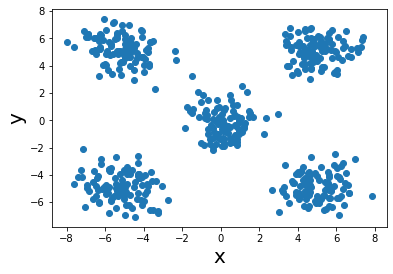

In [80]:
#データ作成
M_x_train = gen_data()
#データ描画
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
v_x = M_x_train[:, 0]
v_y = M_x_train[:, 1]
plt.scatter(v_x, v_y)

## 学習

k-meansアルゴリズムは以下のとおりである

1) 各クラスタ中心の初期値を設定する

2) 各データ点に対して、各クラスタ中心との距離を計算し、最も距離が近いクラスタを割り当てる

3) 各クラスタの平均ベクトル（中心）を計算する

4) 収束するまで2, 3の処理を繰り返す

In [81]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

n_clusters = 5
iter_max = 100

# 各クラスタの重心の初期値をランダムに選択
print("np.random.choice(len(M_x_train), n_clusters, replace=False) :")
print(np.random.choice(len(M_x_train), n_clusters, replace=False))
M_centers = M_x_train[np.random.choice(len(M_x_train), n_clusters, replace=False)]
print("M_centers :")
print(M_centers)

for iii in range(iter_max):
    M_prev_centers = np.copy(M_centers)
    M_D = np.zeros((len(M_x_train), n_clusters))
    # 各データ点に対して、各クラスタ中心との距離を計算
    for i, v_x in enumerate(M_x_train):
        M_D[i] = distance(v_x, M_centers)
    # 各データ点に、最も距離が近いクラスタを割り当てる
    # numpy.argminは配列の要素のうち最大のものの添え字を返す
    v_cluster_index = np.argmin(M_D, axis=1)
    if iii==0:
      print("M_D[:5] :")
      print(M_D[:5])
      print("v_cluster_index[:5] :")
      print(v_cluster_index[:5])
    # 各クラスタの中心を計算
    for k in range(n_clusters):
        v_index_k = v_cluster_index == k
        if k==0 and iii==0:
          print("v_index_k :")
          print(v_index_k.shape)
          print("M_x_train[v_index_k]")
          print(M_x_train[v_index_k].shape)
        M_centers[k] = np.mean(M_x_train[v_index_k], axis=0)
    # 収束判定
    if np.allclose(M_prev_centers, M_centers):
        print("iii :")
        print(iii)
        print(M_prev_centers)
        print(M_centers)
        break

np.random.choice(len(M_x_train), n_clusters, replace=False) :
[380  73 356 469  72]
M_centers :
[[-4.12  6.63]
 [-3.37 -4.41]
 [ 6.26 -5.56]
 [-5.44 -6.4 ]
 [-6.22  6.23]]
M_D[:5] :
[[131.18   0.23  87.54   8.26 130.98]
 [107.35   6.45 148.75   7.97  96.69]
 [ 94.42  10.49 162.89  13.14  82.52]
 [141.47  13.2  175.32   4.54 124.75]
 [113.18  10.68 167.83   8.44  99.11]]
v_cluster_index[:5] :
[1 1 1 3 3]
v_index_k :
(500,)
M_x_train[v_index_k]
(140, 2)
iii :
3
[[ 5.02  5.11]
 [ 0.16 -0.17]
 [ 5.01 -4.87]
 [-5.19 -4.85]
 [-5.17  5.21]]
[[ 5.02  5.11]
 [ 0.16 -0.17]
 [ 5.01 -4.87]
 [-5.19 -4.85]
 [-5.17  5.21]]


## クラスタリング結果

In [82]:
def plt_result(M_x_train, M_centers, M_mesh):
    #　データを可視化
    plt.scatter(M_x_train[:, 0], M_x_train[:, 1], c=v_y_pred, cmap='spring')
    # 中心を可視化
    plt.scatter(M_centers[:, 0], M_centers[:, 1], s=200, marker='X', lw=2, c='black', edgecolor="white")
    # 領域の可視化
    v_pred = np.empty(len(M_mesh), dtype=int)
    for i, v_mesh in enumerate(M_mesh):
        v_d = distance(v_mesh, M_centers)
        v_pred[i] = np.argmin(v_d)
    plt.contourf(M_mesh0, M_mesh1, v_pred.reshape(100, 100), alpha=0.2, cmap='spring')

In [83]:
v_y_pred = np.empty(len(M_x_train), dtype=int)
for i, v_x in enumerate(M_x_train):
    v_d = distance(v_x, M_centers)
    v_y_pred[i] = np.argmin(v_d)

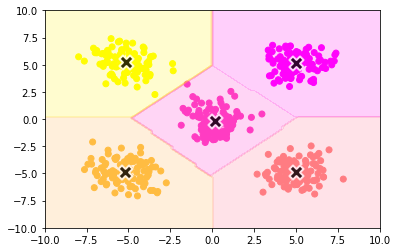

In [84]:
M_mesh0, M_mesh1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
M_mesh = np.array([M_mesh0, M_mesh1]).reshape(2, -1).T

plt_result(M_x_train, M_centers, M_mesh)

## sklearn実装

In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(M_x_train)

In [86]:
print("labels: {}".format(kmeans.labels_))
print("cluster_centers: {}".format(kmeans.cluster_centers_))
kmeans.cluster_centers_

labels: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 

array([[-5.17,  5.21],
       [ 5.01, -4.87],
       [ 5.02,  5.11],
       [-5.19, -4.85],
       [ 0.16, -0.17]])

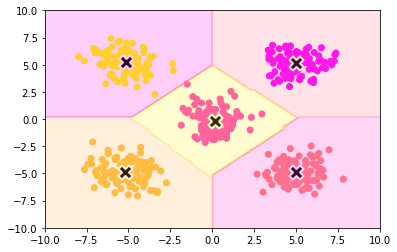

In [87]:
plt_result(M_x_train, kmeans.cluster_centers_, M_mesh)